<a href="https://colab.research.google.com/github/Vinay-Grewal/Brain_MRI-Tumour-CNN-Model/blob/main/BT_CNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import kagglehub

# Downloading the dataset from Kaggle
brain_tumor_dataset_path = kagglehub.dataset_download('sartajbhuvaji/brain-tumor-classification-mri')

print("Dataset import completed successfully.")


Dataset import completed successfully.


In [2]:
import numpy as np
import pandas as pd

import os

# Displaying all files in the input directory
input_directory = '/kaggle/input'
for root, _, files in os.walk(input_directory):
    for file in files:
        print(os.path.join(root, file))

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [4]:
# Importing essential libraries
import ipywidgets as widgets  # For creating interactive widgets
import io  # For handling input/output operations
from PIL import Image  # For image manipulation and processing
import tqdm  # For displaying progress bars
from sklearn.model_selection import train_test_split  # For splitting datasets
import cv2  # For image processing using OpenCV
from sklearn.utils import shuffle  # For shuffling data
import tensorflow as tf  # For building and training deep learning models

In [6]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']



for i in labels:
    folderPath = os.path.join(brain_tumor_dataset_path, 'Training', i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join(brain_tumor_dataset_path, 'Testing', i)

    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [7]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [9]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [10]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [13]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 41s 275ms/step - accuracy: 0.2855 - loss: 3.5399 - val_accuracy: 0.4694 - val_loss: 1.2528
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.5074 - loss: 1.1529 - val_accuracy: 0.5238 - val_loss: 1.1338
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.5683 - loss: 0.9696 - val_accuracy: 0.6088 - val_loss: 0.8984
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.6374 - loss: 0.8380 - val_accuracy: 0.5680 - val_loss: 0.9926
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.6849 - loss: 0.7609 - val_accuracy: 0.6565 - val_loss: 0.8664
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.7064 - loss: 0.6929 - val_accuracy: 0.6259 - val_loss: 0.8924
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.7506 - loss: 0.6044 - val_accuracy: 0.4898 - val_loss: 1.2841
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.7433 - loss: 0.6062 - val_accuracy: 0.61

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

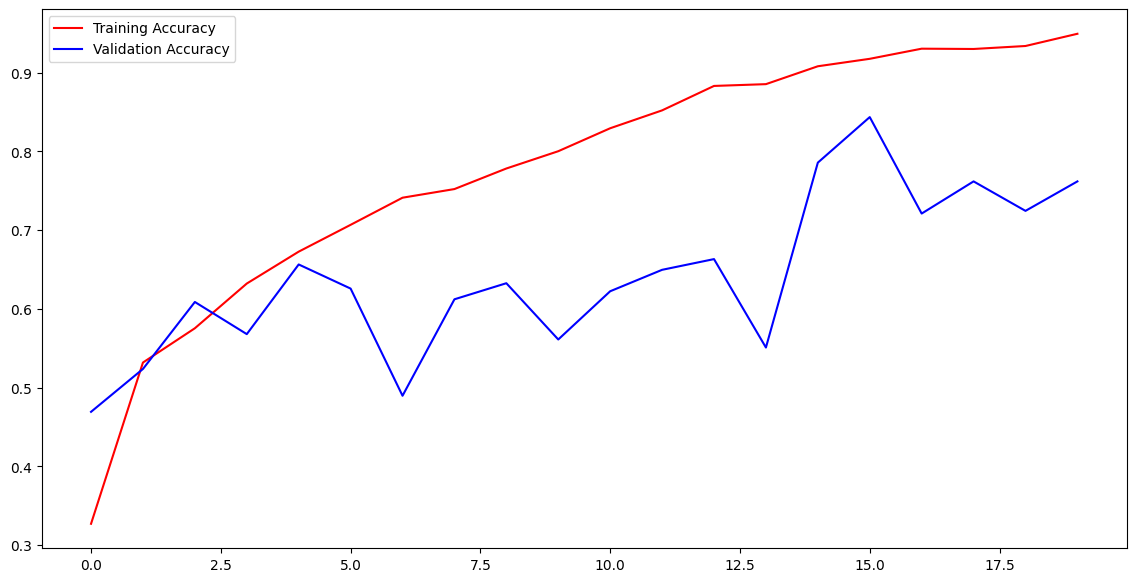

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

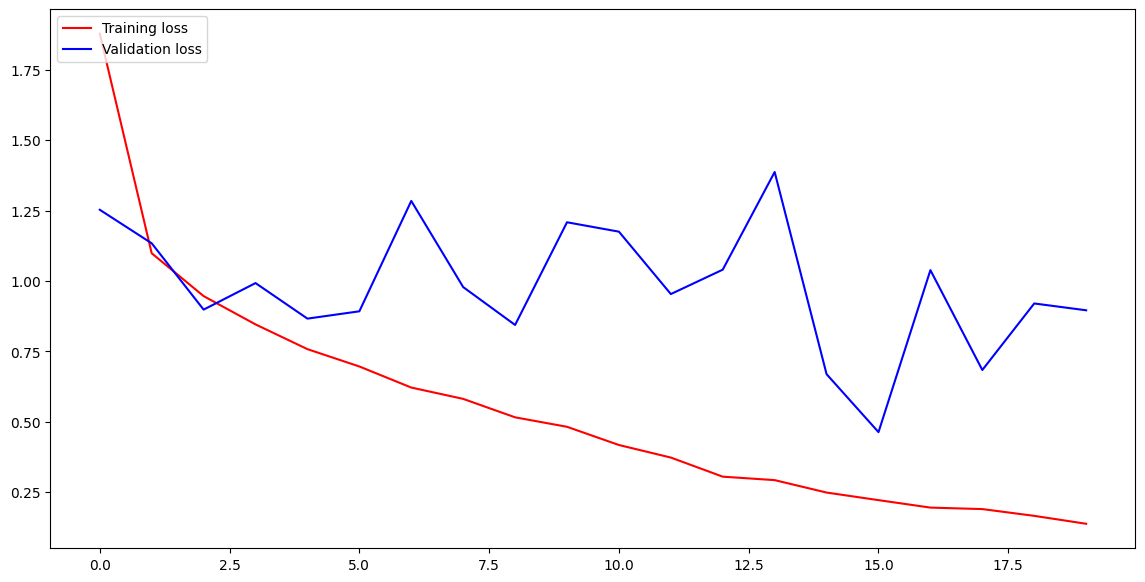

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [19]:
y_pred_probs = model.predict(X_test)                # Probabilities
y_pred_classes = np.argmax(y_pred_probs, axis=1)    # Convert to class indices
y_true_classes = np.argmax(y_test, axis=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step


In [24]:
# Accuracy score
acc = accuracy_score(y_true_classes, y_pred_classes)
print("Test Accuracy:", acc)

Test Accuracy: 0.7522935779816514


In [22]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [23]:
# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:\n", cm)

# Classification Report (Precision, Recall, F1-score)
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes, target_names=labels))

# Macro Precision, Recall, F1-score
precision = precision_score(y_true_classes, y_pred_classes, average='macro')
recall = recall_score(y_true_classes, y_pred_classes, average='macro')
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

print("Macro Precision:", precision)
print("Macro Recall:", recall)
print("Macro F1 Score:", f1)

Confusion Matrix:
 [[83  2  5  3]
 [31 46  2 16]
 [ 8  3 33  8]
 [ 1  1  1 84]]
Classification Report:
                   precision    recall  f1-score   support

    glioma_tumor       0.67      0.89      0.77        93
meningioma_tumor       0.88      0.48      0.63        95
        no_tumor       0.80      0.63      0.71        52
 pituitary_tumor       0.76      0.97      0.85        87

        accuracy                           0.75       327
       macro avg       0.78      0.74      0.74       327
    weighted avg       0.78      0.75      0.74       327

Macro Precision: 0.7802617345300273
Macro Recall: 0.7442040676475137
Macro F1 Score: 0.738132781623565


In [26]:
model.save("BT-CNN_Mode.h5")